## Set the LLM

In [1]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    # model="llama3-groq-tool-use",
    # model="tinyllama", # Does not support tools
    # model="llava-phi3",
    model="llava",  # This works
    # model="llama3.1", # doesn't see an image.
    temperature=0,
)

## Create the prompt

In [2]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant"),
        ("placeholder", "{chat_history}"),
        (
            "human",
            [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "{image_data}"
                    },
                },  # TODO couldn't find a way to make this optional, even putting it in placeholder
                {
                    "type": "text",
                    "text": "{text_data}",
                },
            ],
        ),
        ("placeholder", "{agent_scratchpad}"),
    ]
)
prompt

ChatPromptTemplate(input_variables=['image_data', 'text_data'], optional_variables=['agent_scratchpad', 'chat_history'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], 'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, partial_variables={'chat_history': [], 'agent_scratchpad': []}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant')), MessagesPlaceholder(variable_name='chat_history', optional=True),

## Load smiley so tokens not so big

*********Example binary_fc:
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x04\x03\x00\x00\x00\x88\xcb|\xe6\x00\x00\x00\x18PLTE\xff\xd9\x00\xef\xef\xef\x01\x01\x00\xff\xff\xff\xff\xe8\x0f\xfb\xea\x86cT\x00\xb5\x9a\x00\x96c\x9a\xe4\x00\x00\x0e+IDATx\xda\xec\x9d\xcdo\xa3:\x10\xc0\x9d\xae\xfdz\r"\xb9Wh\x95^7\xa2\xb9;/ds\x05\xd1\xdcWQ\xb5\xbdVU\xd5\xfc\xfb/@\xd2\xf0e\x98\x19\x7f@\x9f2\x97\x15\xbbK\xfcc<3\xf6\x18\xe3aa!K\xaf\x10\xed\xcb\xe5|\xbf\x8f"V\x08\x8f\xb6\xfb}b\xe8\x97\xaf\x97\xcc$\xf4\t8\x92\xac)\xd1~?V\xe8\xfd3\xeb\x90\xed\xde\x1f\x1d\xf4\xbc\x93\xb8\xb0\x95m2*\xe8}\xc4@\x12%\xa3\x81\x9eK\x06\x16\xbe\x1f\x05\xf4<b(\xe1\xc9\xe0\xd0\xabg\x86\x16\x91\x0c\x0b\xbdg$\xd9\x0f\x08MQ\xf3E\xd9CA\xef\x99\x86\xec\x87\x81~fZ\xb2\xf5\xddCc\xe2\x9c"\x8c\xa4\xae\xa1\xe7\xcc\x80$n\xa1\x9f\x99\x11\xd9\x12\xa1\xcf\x7f\xfa\xe7\xbf\x87]\x1ab\xbe\x186\xb8\xdd\xf3%\t\xda\x18\xf3)\xf6\xf9\x8e\xa0c\xc6\x8cS\xdb\x866\xca|\xa1\xb6\x0cm\x98\xf9Lm\x17\xda8sAm\x15\xda\x02\xf3\x89\xda.\xf43\xb
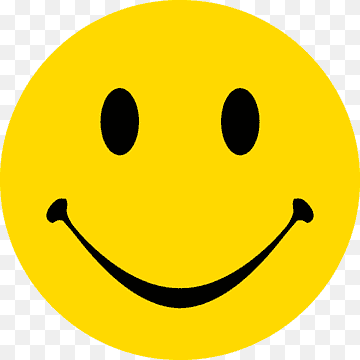

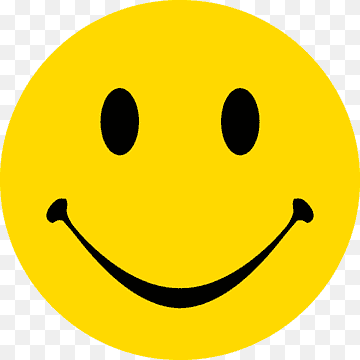

In [3]:
import base64
# To display image in notebook
from IPython.display import Image
filepath = "image2.png"
binary_fc = open(filepath, "rb").read()  # fc aka file_content
print("""*********Example binary_fc:\n""", binary_fc)
base64_utf8_str = base64.b64encode(binary_fc).decode("utf-8")

ext = filepath.split(".")[-1]
dataurl = f"data:image/{ext};base64,{base64_utf8_str}"
print("""*********Example dataurl:\n""", dataurl)

Image(filepath)

## Using llm.invoke method. Putting messages directly in invoke

In [8]:
llm.invoke(
    f"Tell me a fact about cancer. Answer in less than 10 words."
)

AIMessage(content=' Cancer is the second leading cause of death worldwide. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T06:01:34.2492122Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 10319633300, 'load_duration': 9428004600, 'prompt_eval_count': 24, 'prompt_eval_duration': 375558000, 'eval_count': 12, 'eval_duration': 511474000}, id='run-0e7f487e-8bb6-4229-b828-043d440ebbae-0', usage_metadata={'input_tokens': 24, 'output_tokens': 12, 'total_tokens': 36})

In [15]:
# llava. just says it's a base64. The format of the prompt is wrong. It should have image_url
llm.invoke(
    f"Describe this image in less than 10 words: {dataurl}"
)

AIMessage(content=' This is a base64 encoded string. It appears to be an image file, as indicated by the "image/jpeg" MIME type in the Content-Type header. The actual content of the image is not visible here, as it has been encoded using Base64 encoding. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T15:18:19.7875127Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 172937997600, 'load_duration': 8202467800, 'prompt_eval_count': 1026, 'prompt_eval_duration': 3582961000, 'eval_count': 61, 'eval_duration': 161150591000}, id='run-d2d7c6af-28c8-4825-af0f-128a0d8644be-0', usage_metadata={'input_tokens': 1026, 'output_tokens': 61, 'total_tokens': 1087})

In [17]:
# llava this works but takes around 30 seconds on an nvidia geforce rtx 3060 17gb, 24gb ram, 14 core i7. This is probably the best way, since we can dynamically append if there's an image or not at runtime.
llm.invoke(
    [
        ("system", "You are a helpful assistant"),
        # ("placeholder", "{chat_history}"),
        (
            "human",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": dataurl},
                },
                {
                    "type": "text",
                    "text": "Describe this image in less than 10 words:",
                },
            ],
        ),
    ]
)

AIMessage(content=' Smiley face with yellow background. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T15:22:19.4315101Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 27938159200, 'load_duration': 12416500, 'prompt_eval_count': 1, 'prompt_eval_duration': 9798021000, 'eval_count': 9, 'eval_duration': 18123630000}, id='run-020de3b9-f246-4dd6-8b3b-8594b458a253-0', usage_metadata={'input_tokens': 1, 'output_tokens': 9, 'total_tokens': 10})

### Playing around with chaining. Not related to image analysis

In [57]:
# # playing around with chaining
# from langchain import hub
# from langchain_core.runnables import RunnablePassthrough

# prompt = hub.pull("rlm/rag-prompt")

# def context(x):
#     print('This is x:', x)
#     return 'My name is Andrew'
# # try chaining with prompt
# chain: RunnablePassthrough = (
#     {
#         "context": context,
#         "question": RunnablePassthrough(),  # passes through the input question unchanged.
#     }
#     | prompt
#     | llm
# )
# chain.invoke('Whats my name?',{
#     'metadata':{
#         'mykey':'myvalue' # This doesn't appear in the response
#     }
# })

This is x: Whats my name?


AIMessage(content=' Your name is Andrew. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T16:11:32.1852002Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4257436800, 'load_duration': 3876949400, 'prompt_eval_count': 83, 'prompt_eval_duration': 123229000, 'eval_count': 7, 'eval_duration': 253891000}, id='run-44b2fffc-567d-455d-a2c6-5858bed6d708-0', usage_metadata={'input_tokens': 83, 'output_tokens': 7, 'total_tokens': 90})

## Another way. Chaining

This is input in extract_dataurl: <end_of_image>Describe this image in less than 10 words
This is input in extract_text_data: <end_of_image>Describe this image in less than 10 words

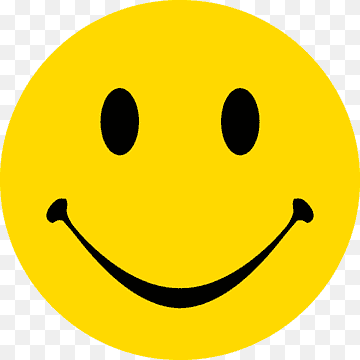
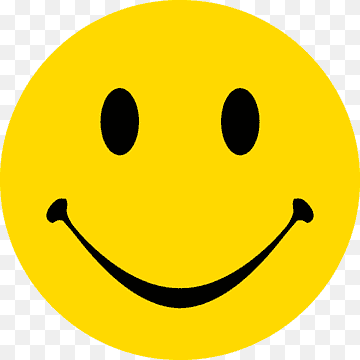

AIMessage(content=' Smiley face with yellow background. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T16:35:50.9334271Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 27272854900, 'load_duration': 15872800, 'prompt_eval_count': 1, 'prompt_eval_duration': 7635137000, 'eval_count': 9, 'eval_duration': 19613406000}, id='run-8ce91b01-e7bb-447a-a54e-deae31adbe02-0', usage_metadata={'input_tokens': 1, 'output_tokens': 9, 'total_tokens': 10})

In [66]:
# use chaining with image analysis
from langchain_core.runnables import RunnablePassthrough

def extract_dataurl(input: str):
    print("This is input in extract_dataurl:", input)
    dataurl = input.split("<end_of_image>")[0]
    return dataurl

def extract_text_data(input: str):
    print("This is input in extract_text_data:", input)
    text_data = input.split("<end_of_image>")[1]
    return text_data

# try chaining with prompt
chain: RunnablePassthrough = (
    {
        "image_data": extract_dataurl,
        "text_data": extract_text_data
    }
    | prompt
    | llm
)
chain.invoke(
    f"{dataurl}<end_of_image>Describe this image in less than 10 words",
)

## Or you could just separate the dataurl from the question with a List

This is input in extract_dataurl:This is input in extract_text_data: ['', 'Describe this image in less than 10 words']
 ['', 'Describe this image in less than 10 words']

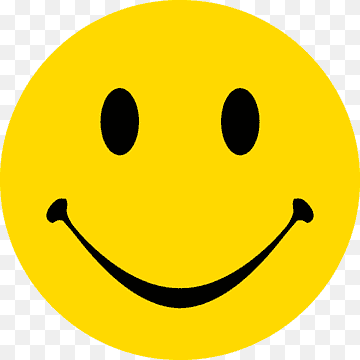
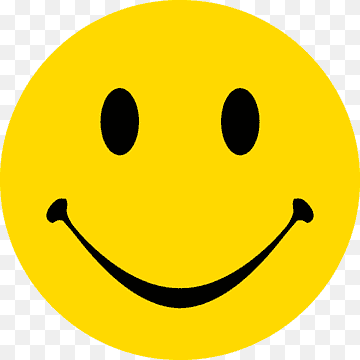

AIMessage(content=' Smiley face with yellow background. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T17:05:14.8915323Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1934177300, 'load_duration': 6963300, 'prompt_eval_count': 1, 'prompt_eval_duration': 1554160000, 'eval_count': 9, 'eval_duration': 370415000}, id='run-6e7a3956-1730-430d-9d1c-7435a64d898e-0', usage_metadata={'input_tokens': 1, 'output_tokens': 9, 'total_tokens': 10})

In [7]:
# use chaining with image analysis
from langchain_core.runnables import RunnablePassthrough

def extract_dataurl(input):
    print("This is input in extract_dataurl:", input)
    dataurl = input[0]
    return dataurl


def extract_text_data(input):
    print("This is input in extract_text_data:", input)
    text_data = input[1]
    return text_data


# try chaining with prompt
chain: RunnablePassthrough = (
    {
        "image_data": extract_dataurl, 
        "text_data": extract_text_data
    } 
    | prompt 
    | llm
)
# Instead of putting the dataurl and question in a string, we can put them in a list
chain.invoke(
    [
        dataurl,
        "Describe this image in less than 10 words"
    ]
)

## Another method. Class

In [6]:
from langchain_core.retrievers import BaseRetriever
from langsmith import (
    traceable,
)  # Automatically looks at .env from os.environ to connect to langsmith


class RagBot:

    def __init__(self):
        self._client = llm

    @traceable()
    def invoke_llm(self, question, dataurl):
        response = self._client.invoke(
            [
                ("system", "You are a helpful assistant"),
                # ("placeholder", "{chat_history}"),
                (
                    "human",
                    [
                        {
                            "type": "image_url",
                            "image_url": {"url": dataurl},
                        },
                        {
                            "type": "text",
                            "text": question,
                        },
                    ],
                ),
            ]
        )
        return response

    @traceable()
    def get_answer(self, question: str, dataurl: str):
        return self.invoke_llm(question, dataurl)


rag_bot = RagBot()

response = rag_bot.get_answer("Describe this image in less than 10 words", dataurl)
response

AIMessage(content=' Smiley face with yellow background. ', response_metadata={'model': 'llava', 'created_at': '2024-09-01T17:04:57.3321382Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1908148900, 'load_duration': 8298900, 'prompt_eval_count': 1, 'prompt_eval_duration': 1526724000, 'eval_count': 9, 'eval_duration': 369741000}, id='run-c6cac045-8ad7-4fd2-b719-c8bd56a50d2c-0', usage_metadata={'input_tokens': 1, 'output_tokens': 9, 'total_tokens': 10})

## llama3.1 doesn't recognize image_url

In [68]:
# llama3.1 doesn't work. Doesn't see an image. Might have to use a different version, qresearch/llama-3.1-8B-vision-378
llm.invoke(
    [
        ("system", "You are a helpful assistant"),
        # ("placeholder", "{chat_history}"),
        (
            "human",
            [
                {
                    "type": "image_url",
                    "image_url": {"url": dataurl},
                },
                {
                    "type": "text",
                    "text": "Describe this image in less than 10 words:",
                },
            ],
        ),
    ]
)

AIMessage(content="I don't see an image. Can you describe it to me?", response_metadata={'model': 'llama3.1', 'created_at': '2024-09-01T16:37:49.1330472Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 21665621000, 'load_duration': 8315049300, 'prompt_eval_count': 36, 'prompt_eval_duration': 122664000, 'eval_count': 15, 'eval_duration': 13221118000}, id='run-00092418-8c90-46fe-85ac-f7df7a63c809-0', usage_metadata={'input_tokens': 36, 'output_tokens': 15, 'total_tokens': 51})